In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def simulate_domain(length, height, timesteps, alpha, T0, heat_sources, boundary_conditions = [0, 0, 0, 0], dx = 1, plotfinal = False, savegif = False):
    """Simulates the heat transfer in a 2D plate with a heat source for a given number of timesteps, using the specified boundary conditions.
    
    Args:
        length: length of the domain;
        height: height of the domain;
        timesteps: Number of timesteps to simulate;
        alpha: Thermal diffusivity of the domain's material;
        T0: Initial temperature distribution in the domain (Time, lenght, height);
        heat_sources: Heat sources distribution in the domain [((position_x, position_y), power, size)];
        boundary_conditions: Boundary conditions on the domain [left, bottom, right, top];
        dx: Spatial step;
        plotfinal: Plots the final timestep in png format;
        savegif: Save all timesteps in gif format.       
        
    Returns:
        Temperature distribution in the plate after timesteps of heat transfer.
    """
    # time step
    dt = dx**2 / (4*alpha)

    # Initialize the temperature grid
    T = np.empty((timesteps, length, height))
    
    # Initial condition 
    T[0] = T0

    # Boundary conditions
    T[:, :, 0] = boundary_conditions[0]  # left
    T[:, 0, :] = boundary_conditions[1]  # bottom
    T[:, :, -1] = boundary_conditions[2]  # right
    T[:, -1, :] = boundary_conditions[3]  # top

    # Time loop
    for t in range(1, timesteps):
        for i in range(1, length-1):
            for j in range(1, height-1):
                for heat_source in heat_sources:
                    x, y = heat_source[0]
                    power = heat_source[1]
                    size = heat_source[2]
                    if (i-x)**2 + (j-y)**2 <= size**2:
                        temp = power/(size**2*np.pi) #Calculating the temperature of the heat source
                        T[t, i, j] = temp
                        break
                else:
                    T[t, i, j] = T[t-1, i, j] + alpha * dt / dx**2 * (T[t-1, i+1, j] + T[t-1, i-1, j] + T[t-1, i, j+1] + T[t-1, i, j-1] - 4*T[t-1, i, j])

    # Plot the temperature at the final time step
    if plotfinal:
        plt.title('Temperature distribution [°C]')
        plt.xlabel("y [mm]")
        plt.ylabel("x [mm]")
        plt.pcolormesh(T[-1], cmap=plt.cm.jet, vmin=0, vmax=100)
        plt.colorbar()
        plt.show()
        plt.savefig("heat_equation_solution_with_heat_source.png", bbox_inches="tight")
    
    # Whole temperature simulation in .gif format
    if savegif:

        def heat_map_plot(T_k, k):
            plt.clf()
            plt.title(f"Temperature distribution [°C] at time step {k*dt:.3f}")
            plt.xlabel("y [mm]")
            plt.ylabel("x [mm]")
            plt.pcolormesh(T_k, cmap=plt.cm.jet, vmin=0, vmax=100)
            plt.colorbar()
            return plt

        def animate(k):
            heat_map_plot(T[k], k)

        anim = animation.FuncAnimation(plt.figure(), animate, interval=100, frames=timesteps, repeat=False)
        anim.save("heat_equation_solution_with_heat_source.gif", writer="imagemagick")

    return T

In [5]:
# Phosphating Tank example
# Constants
L = 100  # length of the domain
H = 100  # height of the domain
T = 500  # number of time steps
# alpha = 0.14558  # thermal diffusivity of water [mm^2/s]
alpha = 0.281  # thermal diffusivity of Zinc phosphate [mm^2/s]

# Electrical Power in Watts
power1 = 4000 # 2, 3, 4, 5, 6 kW - 2kW -> 63.15 °C

# Heat sources [((x, y), temperature, size)]
size1 = 6.35 / 2 # real size of 100 or 300 mm com 1/4" inches or 6.35 mm of diameter 
heat_sources = [((20, 0), power1, size1), ((40, 0), power1, size1), ((60, 0), power1, size1), ((80, 0), power1, size1), ((20, 99), power1, size1), ((40, 99), power1, size1), ((60, 99), power1, size1), ((80, 99), power1, size1)]

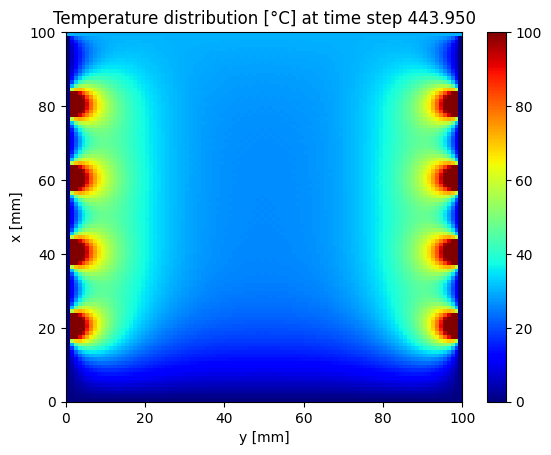

In [6]:
x = simulate_domain(L, H, T, alpha, np.random.uniform(low=22, high=30, size=(L, H)), heat_sources, boundary_conditions = [0, 0, 0, 30], savegif = True)

In [12]:
# Stainless Steel Plate Heating example
# Constants
L = 100  # length of the domain
H = 100  # height of the domain
T = 750  # number of time steps
# alpha = 0.14558  # thermal diffusivity of water [mm^2/s]
alpha = 3.352  # thermal diffusivity of stainless steel 310 [mm^2/s]

# Electrical Power in Watts
power1 = 4000 # 2, 3, 4, 5, 6 kW - 2kW -> 63.15 °C

# Heat sources [((x, y), temperature, size)]
size1 = 6.35 / 2 # real size of 100 or 300 mm com 1/4" inches or 6.35 mm of diameter 
heat_sources = [((0, 0), 0, 0)]
T0 = 25

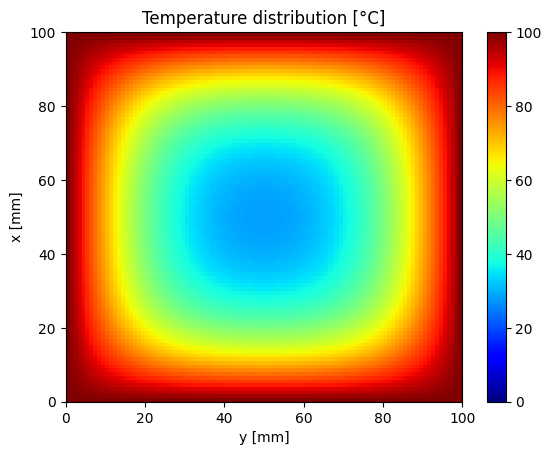

<Figure size 640x480 with 0 Axes>

In [13]:
x = simulate_domain(L, H, T, alpha, T0, heat_sources, boundary_conditions = [100, 100, 100, 100], plotfinal = True)